In [10]:
#import pandas 
import pandas as pd

In [11]:
#Read in the Dataset
pollen_load_data = pd.read_csv('../data/2015_pollen_load_data.csv')

In [12]:
#First look at the dataset
pollen_load_data

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1.00,Sinapis arvensis,Sinapis arvensis,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1.00,vegetation,Acer campestre,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1.00,vegetation,Acer campestre,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,1.00,Senecio jacobea,Rubus fruticosus agg.,Wild,30,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1756,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.50,Senecio jacobea,Senecio jacobea,Wild,95,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1757,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,1.00,Senecio jacobea,Senecio jacobea,Wild,55,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1758,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.50,Senecio jacobea,Sonchus arvensis,Wild,5,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Drop/rename columns
pollen_load_data.columns

Index(['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on',
       'Plant pollen', 'Status', 'Proportion', 'Weight', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [14]:
#Dropped unnamed columns 
pollen_load_data.drop(columns=['Unnamed: 11'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 12'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 13'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 14'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 15'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 16'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 17'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 18'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 19'], inplace=True)

In [15]:
#NaNs
pollen_load_data.isnull().sum() * 100 / len(pollen_load_data)

Farm            0.0
Type            0.0
Round           0.0
Date            0.0
Species         0.0
Load            0.0
Netted on       0.0
Plant pollen    0.0
Status          0.0
Proportion      0.0
Weight          0.0
dtype: float64

In [16]:
#Check column data types 
pollen_load_data.dtypes

Farm             object
Type             object
Round            object
Date             object
Species          object
Load            float64
Netted on        object
Plant pollen     object
Status           object
Proportion        int64
Weight          float64
dtype: object

In [17]:
#Reassign data types
pollen_load_data = pollen_load_data.astype({'Load': 'int', 'Weight': 'int'})
pollen_load_data.dtypes

Farm            object
Type            object
Round           object
Date            object
Species         object
Load             int64
Netted on       object
Plant pollen    object
Status          object
Proportion       int64
Weight           int64
dtype: object

In [18]:
#Bin columns
pollen_load_data['Date'].unique()
pollen_load_data['Date'].describe()

bins = [30, 60, 90, 120, 150]
labels = ['30-60', '61-90', '91-120', '121-150']

# Bin the 'Proportion' column 
pollen_load_data['proportion_binned'] = pd.cut(pollen_load_data['Proportion'], bins=bins, labels=labels, right=True)

pollen_load_data[['Proportion', 'proportion_binned']]

,Proportion,proportion_binned
0,100,91-120
1,100,91-120
2,100,91-120
3,100,91-120
4,100,91-120
...,...,...
1755,30,NaN
1756,95,91-120
1757,55,30-60
1758,5,NaN


In [19]:
#Seperate the data from one column into multiple columns 
pollen_load_data.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight,proportion_binned
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100,91-120
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0,Sinapis arvensis,Sinapis arvensis,Wild,100,25,91-120
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0,Sinapis arvensis,Sinapis arvensis,Wild,100,75,91-120
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100,91-120
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100,91-120


In [20]:
pollen_load_data['Plant pollen'].unique()

array(['Sinapis arvensis', 'Acer campestre', 'Taraxacum agg.',
       'Lamium album', 'Tripleurospermum inodorum',
       'Rubus fruticosus agg.', 'Ranunculus repens',
       'Heracleum sphondylium', 'Phacelia tanacetifolia',
       'Veronica persica', 'Leucanthemum vulgare', 'Brassica-type',
       'Chaerophyllum temulum', 'Rhamnus cathartica', 'Reseda lutea',
       'Viburnum lantana', 'Sisymbrium officinale', 'Silene dioica',
       'Ranunculus acris', 'Aegopodium podagraria', 'Cornus sanguinea',
       'Lychnis flos-cuculi', 'Daucus carota', 'Centaurea nigra',
       'Galium aparine', 'Knautia arvensis', 'Achillea millefolium',
       'Bryonia dioica', 'Centaurea scabiosa', 'Plantago spp',
       'Senecio vulgaris', 'Alliaria petiolata', 'Berberis vulgaris',
       'Anthriscus sylvestris', 'Tilia spp', 'Trifolium repens',
       'Medicago lupulina', 'Sherardia arvensis', 'Ilex aquifolium',
       'Sonchus asper', 'Torilis japonica', 'Sonchus arvensis',
       'Bellis perennis', 'Ve

In [21]:
#Remove duplicates
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]

pollen_load_data.drop_duplicates(keep="first", inplace=True)

In [22]:
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]


,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight,proportion_binned


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [24]:
#Saved as a variable
pollen_df = pd.read_csv("../data/2015_pollen_load_data.csv")
pollen_df.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1.00,Sinapis arvensis,Sinapis arvensis,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1.00,vegetation,Acer campestre,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1.00,vegetation,Acer campestre,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Count the occurrences of each status
avg_plant_pollen = pollen_df['Status'].value_counts().sort_values(ascending=False)
avg_plant_pollen

Status
Wild    1281
Sown     400
Crop      79
Name: count, dtype: int64

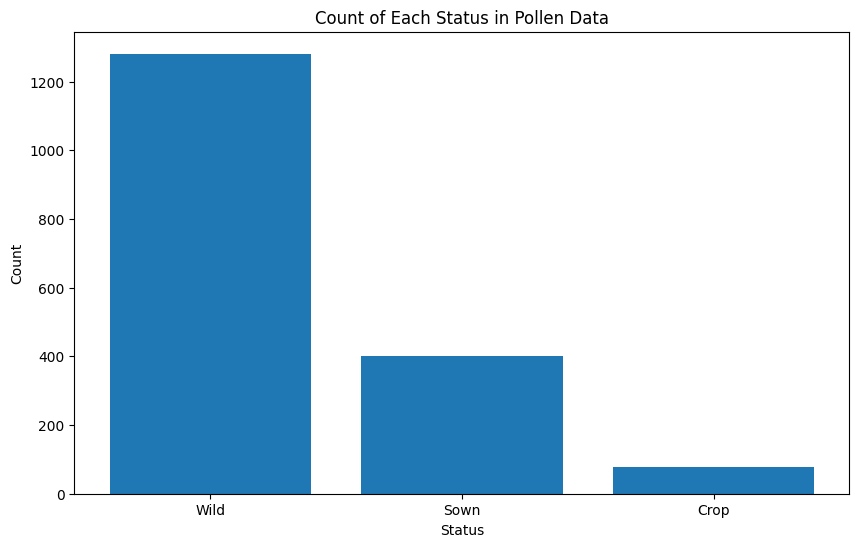

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(avg_plant_pollen.index, avg_plant_pollen.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Each Status in Pollen Data')
plt.show()

plt.tight_layout()
plt.show()

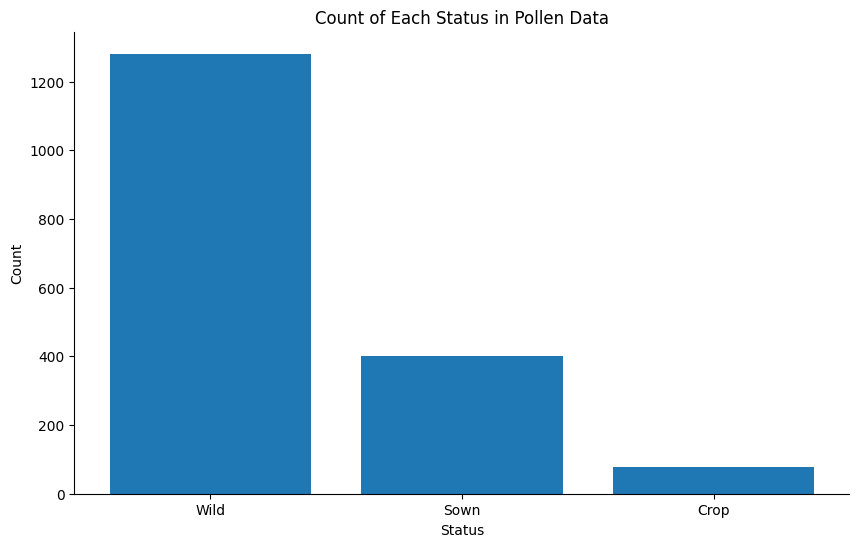

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(avg_plant_pollen.index, avg_plant_pollen.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Each Status in Pollen Data')
plt.show()

plt.tight_layout()
plt.show()

In [28]:
avg_species_streams = pollen_df.groupby("Species")["Load"].mean().sort_values(ascending=False)
avg_species_streams

Species
Andrena angustior              1.000000
Megachile centuncularis        1.000000
Osmia leaiana                  1.000000
Melitta tricincta              1.000000
Melitta leporina               1.000000
Andrena trimmerana             1.000000
Anthophora plumipes            1.000000
Lasioglossum puncticolle       1.000000
Osmia caerulescens             1.000000
Andrena carantonica            0.949074
Andrena florea                 0.916667
Lasioglossum zonulum           0.886364
Andrena alfkenella             0.875000
Colletes daviesanus            0.875000
Andrena fulva                  0.833333
Andrena nitida                 0.825658
Andrena flavipes               0.778153
Lasioglossum malachurum        0.750259
Lasioglossum laevigatum        0.750000
Lasioglossum leucozonium       0.743534
Andrena chrysosceles           0.699755
Andrena wilkella               0.666667
Andrena dorsata                0.660985
Andrena minutuloides           0.659091
Lasioglossum fulvicorne        0

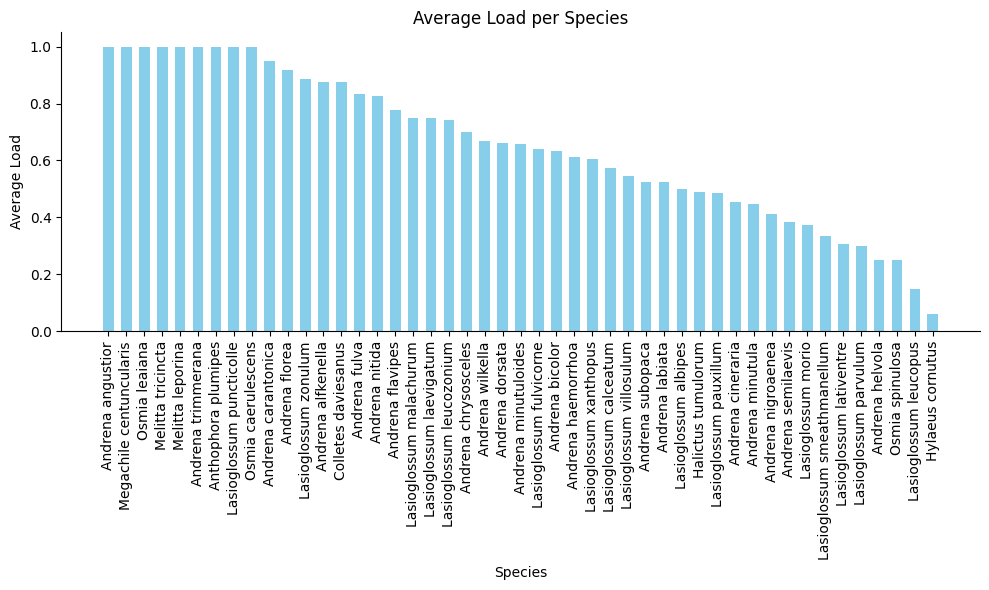

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_species_streams.index, avg_species_streams.values, color='skyblue', width=0.6)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Species')
plt.ylabel('Average Load')
plt.title('Average Load per Species')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Data comprise flower abundance and diversity data and bee abundance, diversity and activity data collected during extensive surveys 
#carried out on farms in Hampshire and West Sussex, southern England between 2013 and 2015. The pollen diets of wild solitary bees were 
#quantified using direct observations and pollen load analysis. The purpose of the study was to provide valuable information to scientists, 
#governments and land managers in designing more effective measures to conserve the broader wild bee community on agricultural land. The 
#work was funded by the Natural Environment Research Council grant NE/J016802/1 and the Game and Wildlife Conservation Trust.
#I broke down the Species to see all the different types of bees that were in the dataset. I also looked at the Average Load column to see how many
#of each analysis there were.

In [32]:
# Check data types
print("Data Types Before:\n", pollen_load_data.dtypes)

# Convert 'Date' to datetime
pollen_load_data['Date'] = pd.to_datetime(pollen_load_data['Date'])
           
# Convert categorical columns
pollen_load_data['Species'] = pollen_load_data['Species'].astype('category')

# Check data types after conversion
print("Data Types After:\n", pollen_load_data.dtypes)

Data Types Before:
 Farm                   object
Type                   object
Round                  object
Date                   object
Species                object
Load                    int64
Netted on              object
Plant pollen           object
Status                 object
Proportion              int64
Weight                  int64
proportion_binned    category
dtype: object
Data Types After:
 Farm                         object
Type                         object
Round                        object
Date                 datetime64[ns]
Species                    category
Load                          int64
Netted on                    object
Plant pollen                 object
Status                       object
Proportion                    int64
Weight                        int64
proportion_binned          category
dtype: object


C:\Users\schne\AppData\Local\Temp\ipykernel_9060\444247126.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pollen_load_data['Date'] = pd.to_datetime(pollen_load_data['Date'])


In [34]:
# Summary statistics
print(pollen_load_data.describe())

                                Date         Load   Proportion       Weight
count                           1516  1516.000000  1516.000000  1516.000000
mean   2015-06-20 23:30:33.245382400     0.347625    55.319921    33.831794
min              2015-04-22 00:00:00     0.000000     2.000000     0.000000
25%              2015-06-10 00:00:00     0.000000    15.000000     7.000000
50%              2015-06-27 00:00:00     0.000000    52.500000    23.000000
75%              2015-07-03 00:00:00     1.000000   100.000000    50.000000
max              2015-08-10 00:00:00     1.000000   100.000000   100.000000
std                              NaN     0.476373    37.853913    31.701039


In [36]:
# Check available columns
print("Available columns:")
print(pollen_load_data.columns.tolist())

Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight', 'proportion_binned']


In [39]:
# Total load by species
species_load = pollen_load_data.groupby('Species')['Load'].sum()
print(species_load)

Species
Andrena alfkenella               8
Andrena angustior                4
Andrena bicolor                  5
Andrena carantonica             20
Andrena chrysosceles            23
Andrena cineraria                5
Andrena dorsata                  6
Andrena flavipes                57
Andrena florea                   2
Andrena fulva                    2
Andrena haemorrhoa              22
Andrena helvola                  0
Andrena labiata                  0
Andrena minutula                 3
Andrena minutuloides             4
Andrena nigroaenea               5
Andrena nitida                  20
Andrena semilaevis              12
Andrena subopaca                 2
Andrena trimmerana               1
Andrena wilkella                 1
Anthophora plumipes              3
Colletes daviesanus              1
Halictus tumulorum              12
Hylaeus cornutus                 0
Lasioglossum albipes             0
Lasioglossum calceatum          17
Lasioglossum fulvicorne          1
Lasioglossum

C:\Users\schne\AppData\Local\Temp\ipykernel_9060\1447853500.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_load = pollen_load_data.groupby('Species')['Load'].sum()


In [45]:
# Correlation between Load and Weight (both are numeric in your dataset)
correlation = pollen_load_data[['Load', 'Weight']].corr()
print("Correlation between Load and Weight:")
print(correlation)

Correlation between Load and Weight:
            Load    Weight
Load    1.000000  0.406474
Weight  0.406474  1.000000


In [46]:
# Correlation between Load, Weight, and Proportion
correlation_matrix = pollen_load_data[['Load', 'Weight', 'Proportion']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Load    Weight  Proportion
Load        1.000000  0.406474   -0.074108
Weight      0.406474  1.000000    0.696991
Proportion -0.074108  0.696991    1.000000


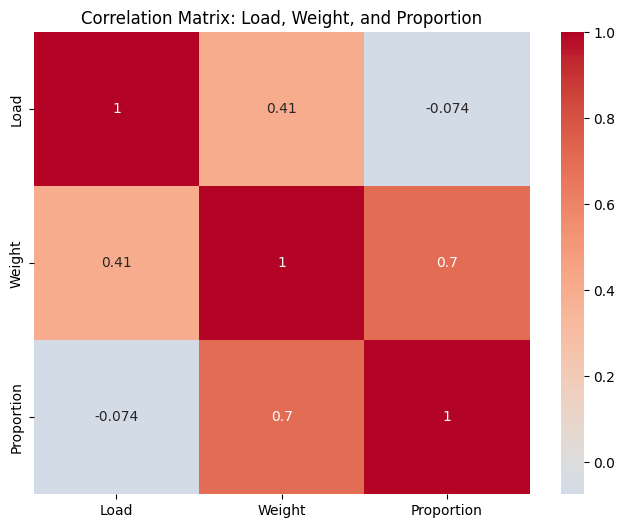

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = pollen_load_data[['Load', 'Weight', 'Proportion']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Load, Weight, and Proportion')
plt.show()

In [49]:
# Use your cleaned data for all analysis
print("Your actual bee pollen data:")
print(pollen_load_data.head())
print(f"Shape: {pollen_load_data.shape}")
print(f"Columns: {pollen_load_data.columns.tolist()}")

Your actual bee pollen data:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor     0  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor     0  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
5  Farm1  ELS   One 2015-04-24      Andrena dorsata     0  Sinapis arvensis   

       Plant pollen Status  Proportion  Weight proportion_binned  Year  
0  Sinapis arvensis   Wild         100     100            91-120  2015  
1  Sinapis arvensis   Wild         100      25            91-120  2015  
2  Sinapis arvensis   Wild         100      75            91-120  2015  
3    Acer campestre   Wild         100     100            91-120  2015  
5  Sinapis arvensis   Wild         100      50            91-120  2015  
Shape: (1516, 13)
Columns: ['Farm', 'Type', 'Round', 'Date

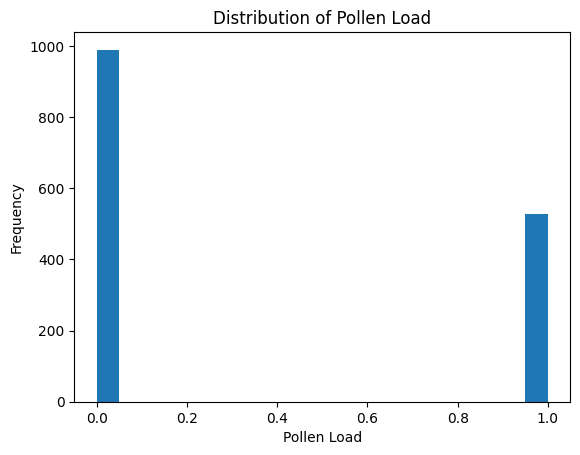

In [ ]:
import matplotlib.pyplot as plt
# Distribution of pollen load
plt.hist(pollen_load_data['Load'], bins=20)
plt.title('Distribution of Pollen Load')
plt.xlabel('Pollen Load')
plt.ylabel('Frequency')
plt.show()

#Pollen load distribution is right-skewed, indicating a small proportion of bees carry exceptionally high loads.